In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

# 단어 임베딩 사용하기

In [2]:
from keras.layers import Embedding

embedding_layer = Embedding(1000,64)

In [3]:
from keras.datasets import imdb
from keras import preprocessing

#특성으로 사용할 단어의 수
max_features = 10000
#사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용)
maxlen = 20

#정수 리스트로 데이터를 로드
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

#리스트를 (samples, maxlen)크기의 2D 정수 텐서로 변환
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

위 코드는 가장 많이 등장한 10000개의 단어를 기준으로 하지만, 불용어를 전처리 한 뒤 학습을 한다면 더 좋은 결과를 얻을 수 있을 것

In [4]:
x_train[0]

array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32])

In [5]:
len(x_train[0])

20

In [6]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
#나중에 임베딩된 입력을 Flatten층에서 펼치기 위해 Embedding 층에 input_length를 지정함
#Embedding 층의 출력크기는 (samples, maxlen, 8)
model.add(Embedding(10000,8,input_length=maxlen))

#3D 임베딩 텐서를 (samples, maxlen * 8)크기의 2D텐서로 펼침
model.add(Flatten())

#분류기를 추가
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


c:\programdata\anaconda3\envs\deep\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 118us/step - loss: 0.6655 - acc: 0.6296 - val_loss: 0.6127 - val_acc: 0.7046
Epoch 2/10
20000/20000 [==============================] - 2s 102us/step - loss: 0.5369 - acc: 0.7534 - val_loss: 0.5261 - val_acc: 0.7312
Epoch 3/10
20000/20000 [==============================] - 2s 101us/step - loss: 0.4590 - acc: 0.7895 - val_loss: 0.5015 - val_acc: 0.7446
Epoch 4/10
20000/20000 [==============================] - 2s 104us/step - loss: 0.4202 - acc: 0.8101 - val_loss: 0.4944 - val_acc: 0.7510
Epoch 5/10
20000/20000 [==============================] - 2s 101us/step - loss: 0.3940 - acc: 0.8250 - val_loss: 0.4935 - val_acc: 0.7564
Epoch 6/10
20000/20000 [==============================] - 2s 101us/step - loss: 0.3718 - acc: 0.8377 - val_loss: 0.4982 - val_acc: 0.7564
Epoch 7/10
20000/20000 [==============================] - 2s 103us/step - loss: 0.3518 - acc: 0.8472 - val_loss: 0.5022 - v

### 원본 IMDB 텍스트에서 단어 임베딩까지

In [1]:
import os

imdb_dir = './datasets/aclImdb'
train_dir = os.path.join(imdb_dir,'train')

labels=[]
texts=[]

for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name,fname),encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
        

In [2]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen=100 #100개 단어 이후는 버림
training_samples = 200 # 훈련 샘플은 200개!
validation_samples = 10000 # 검증 샘플은 만개!
max_words = 10000 #데이터셋에서 가장 빈도높은 단어 만개만 사용!

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(f'{len(word_index)}개의 토큰을 찾았습니당.')

data = pad_sequences(sequences, maxlen=maxlen)

labels= np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data=data[indices]
labels=labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Using TensorFlow backend.


88582개의 토큰을 찾았습니당.
데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)


In [3]:
glove_dir = './datasets/glove.6B/'

embeddings_index={}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'),encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index[word] = coefs
f.close()

print(f'{len(embeddings_index)}개의 단어 벡터를 찾았음')

400000개의 단어 벡터를 찾았음


In [4]:
embedding_dim= 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [10]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [12]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(x_train,
                    y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 6ms/step - loss: 2.1592 - acc: 0.5000 - val_loss: 0.7287 - val_acc: 0.4993
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6410 - acc: 0.6600 - val_loss: 0.8462 - val_acc: 0.5009
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5947 - acc: 0.6050 - val_loss: 0.7258 - val_acc: 0.5331
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2510 - acc: 0.9350 - val_loss: 1.3163 - val_acc: 0.4981
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4054 - acc: 0.8550 - val_loss: 0.9223 - val_acc: 0.5335
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1192 - acc: 0.9900 - val_loss: 0.8538 - val_acc: 0.5427
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2961 - acc: 0.8650 - val_loss: 0.7327 - val_acc: 0.5781
Epoch 8/10
200/200 [========

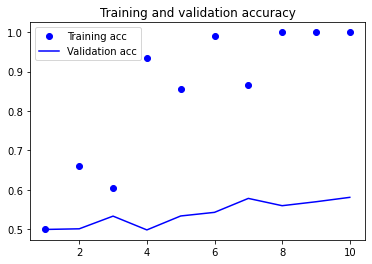

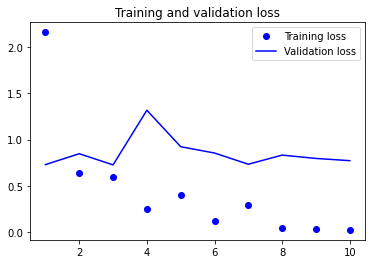

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(x_train,
                   y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data=(x_val, y_val))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


c:\programdata\anaconda3\envs\deep\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 5ms/step - loss: 0.6883 - acc: 0.5150 - val_loss: 0.6914 - val_acc: 0.5196
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4595 - acc: 0.9800 - val_loss: 0.6929 - val_acc: 0.5213
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.2321 - acc: 0.9900 - val_loss: 0.7040 - val_acc: 0.5258
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1021 - acc: 0.9950 - val_loss: 0.7257 - val_acc: 0.5256
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0486 - acc: 0.9950 - val_loss: 0.7161 - val_acc: 0.5284
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0253 - acc: 1.0000 - val_loss: 0.7129 - val_acc: 0.5299
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0142 - acc: 1.0000 - val_loss: 0.7221 - val_acc: 0.5300
Epoch 8/10
200/200 [========

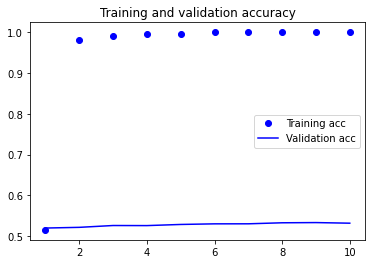

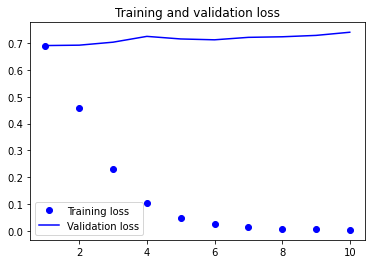

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
test_dir = os.path.join(imdb_dir,'test')

labels=[]
texts=[]

for label_type in ['neg','pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [20]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 60us/step


[0.7799108702421188, 0.5741199851036072]

In [ ]:
import numpy as np
import tensorflow as tf


[1,2,3]
[4,5,6]
[7,8,9]


embedding = Embedding(input_dim=10,output_dim=2)#input_dim은 0을 쓰지 않기 때문에 +1을 해서 숫자를 넣어줘야함(단어 9개라 여기선 10개)